In [1]:
import sys
sys.path.append(r'C:\Users\gustavo\Documents\Data Science\08-GitHub\Portifolio\Classification\dsa_single_model')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from collections import Counter

plt.style.use('ggplot')

In [3]:
from utils.graphs import plot_numerical_data

# Read Dataset

In [4]:
file_x = r'..\data\processed\feat_X_train.parquet'
file_y = r'..\data\processed\feat_y_train.parquet'

x_train = pd.read_parquet(file_x)
y_train = pd.read_parquet(file_y)

In [5]:
x_train

,numerical_pipe__insulina,numerical_pipe__pressao_sanguinea,numerical_pipe__glicose,numerical_pipe__grossura_pele,numerical_pipe__bmi,numerical_pipe__num_gestacoes,numerical_pipe__indice_historico,numerical_pipe__idade
108,0.000000,58.0,83.0,31.0,34.3,3.0,0.336,25
352,0.384956,82.0,61.0,28.0,34.4,3.0,0.243,46
238,0.384956,84.0,164.0,21.0,30.8,9.0,0.831,32
298,1.000000,78.0,100.0,25.0,36.6,13.5,0.412,46
300,0.384956,78.0,167.0,29.6,32.3,0.0,0.839,30
...,...,...,...,...,...,...,...,...
237,0.384956,90.0,179.0,27.0,44.1,0.0,0.686,23
31,0.555556,76.0,158.0,36.0,31.6,3.0,0.851,28
488,0.384956,72.0,99.0,17.0,25.6,4.0,0.294,28
40,0.045455,64.0,180.0,25.0,34.0,3.0,0.271,26


In [6]:
df = pd.concat([x_train, y_train], axis=1)

In [7]:
print(f'Dataset rows and columns: {df.shape}')

Dataset rows and columns: (450, 9)


In [8]:
# Selecionando as variáveis categóricas

cat_var = df.select_dtypes(include=['category','object', 'bool']).columns
cat_var

Index([], dtype='object')

In [9]:
num_var = df.select_dtypes(include=['number']).columns
num_var

Index(['numerical_pipe__insulina', 'numerical_pipe__pressao_sanguinea',
       'numerical_pipe__glicose', 'numerical_pipe__grossura_pele',
       'numerical_pipe__bmi', 'numerical_pipe__num_gestacoes',
       'numerical_pipe__indice_historico', 'numerical_pipe__idade', 'classe'],
      dtype='object')

# Check target - Y_true

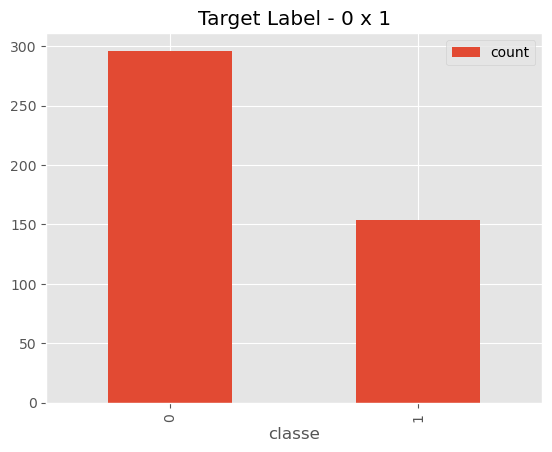

In [10]:
# verificar quantidade de labels por target

df['classe'].value_counts().plot.bar()
plt.title('Target Label - 0 x 1')
plt.legend()
plt.show()

# Exploratory Analisys

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 450 entries, 108 to 595
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   numerical_pipe__insulina           450 non-null    float64
 1   numerical_pipe__pressao_sanguinea  450 non-null    float64
 2   numerical_pipe__glicose            450 non-null    float64
 3   numerical_pipe__grossura_pele      450 non-null    float64
 4   numerical_pipe__bmi                450 non-null    float64
 5   numerical_pipe__num_gestacoes      450 non-null    float64
 6   numerical_pipe__indice_historico   450 non-null    float64
 7   numerical_pipe__idade              450 non-null    int64  
 8   classe                             450 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 35.2 KB


# Check NA values

<Axes: >

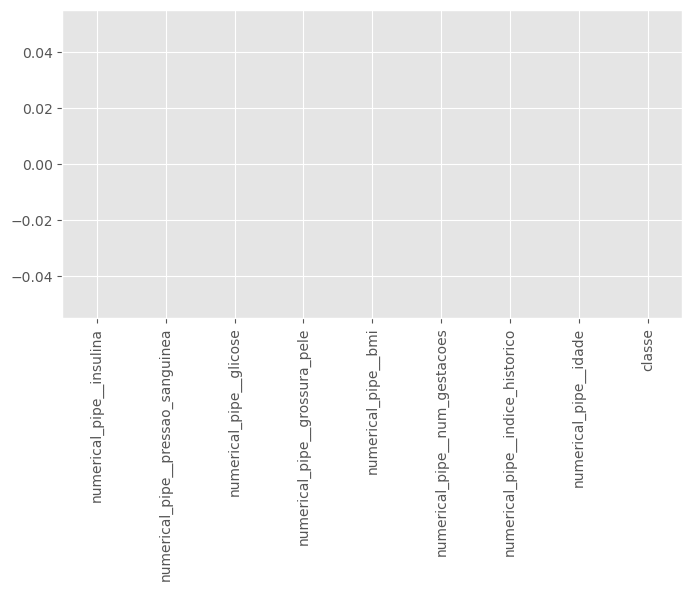

In [12]:
df.isna().mean().plot.bar(figsize=(8,4))

# Check Cardinality

In [13]:
for col in cat_var:
    print('labels por variável: ' + col + ' ' + str(df[col].nunique()))

In [14]:
for col in num_var:
    print('Numero de labels por variável na coluna: ' + col + ' ' + str(df[col].nunique()))

Numero de labels por variável na coluna: numerical_pipe__insulina 10
Numero de labels por variável na coluna: numerical_pipe__pressao_sanguinea 59
Numero de labels por variável na coluna: numerical_pipe__glicose 124
Numero de labels por variável na coluna: numerical_pipe__grossura_pele 119
Numero de labels por variável na coluna: numerical_pipe__bmi 215
Numero de labels por variável na coluna: numerical_pipe__num_gestacoes 15
Numero de labels por variável na coluna: numerical_pipe__indice_historico 334
Numero de labels por variável na coluna: numerical_pipe__idade 44
Numero de labels por variável na coluna: classe 2


# Drop constant features

# nao tem variável constante

In [15]:
# renew dtype
num_var = df.select_dtypes(include=['number']).columns
cat_var = df.select_dtypes(include=['object', 'category', 'bool']).columns

# Graphs

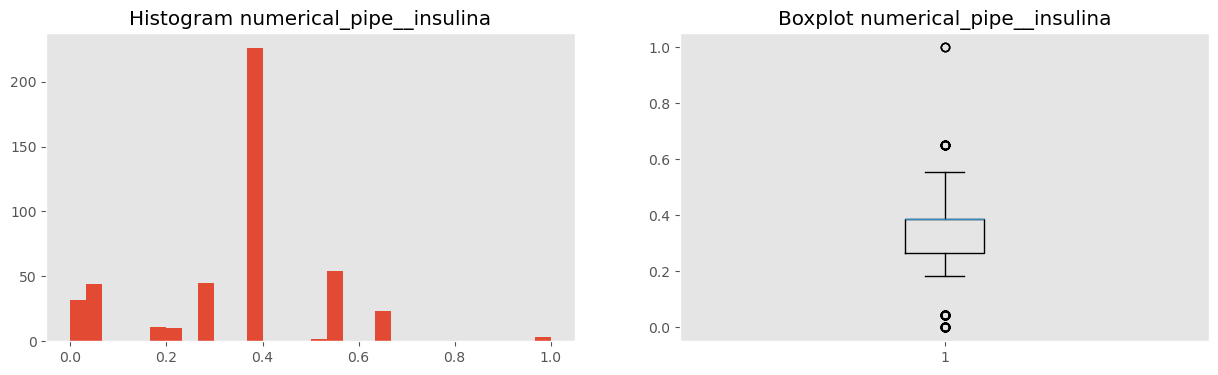

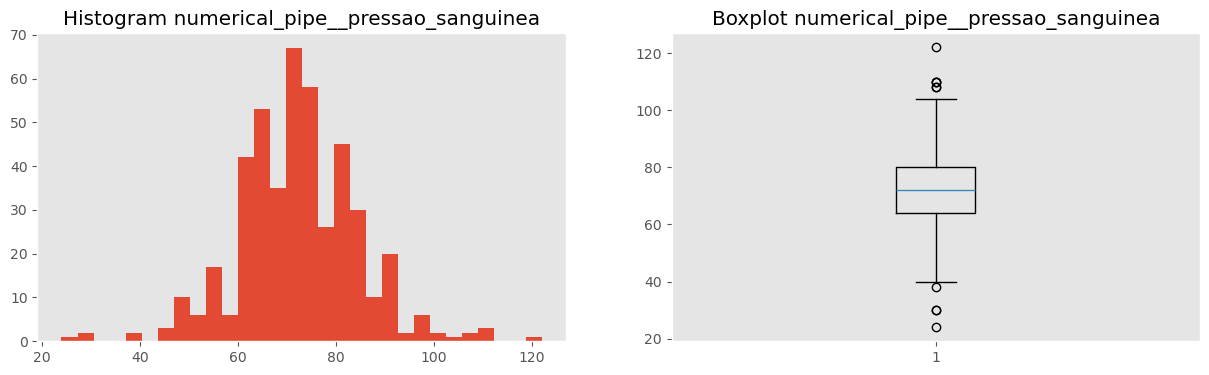

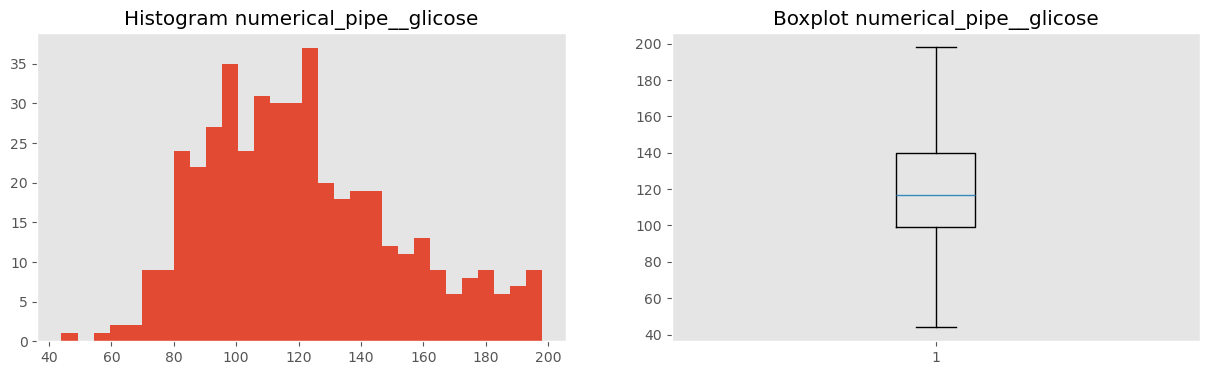

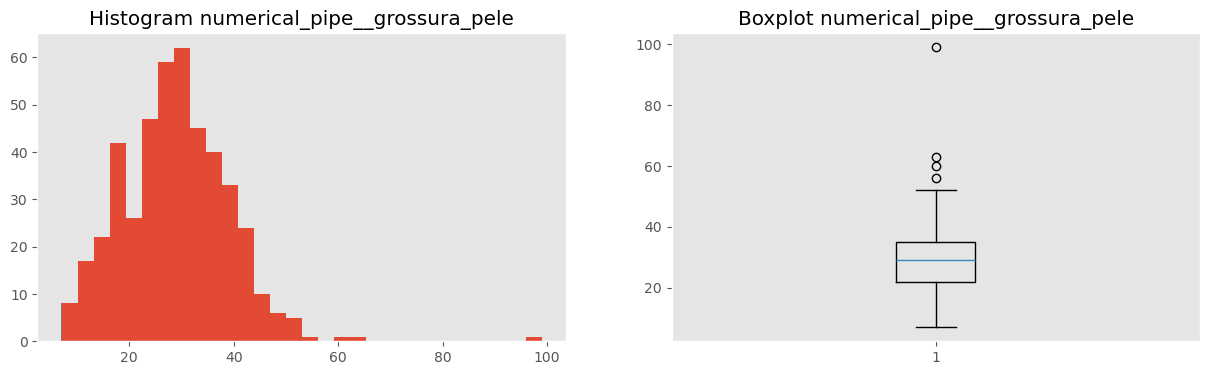

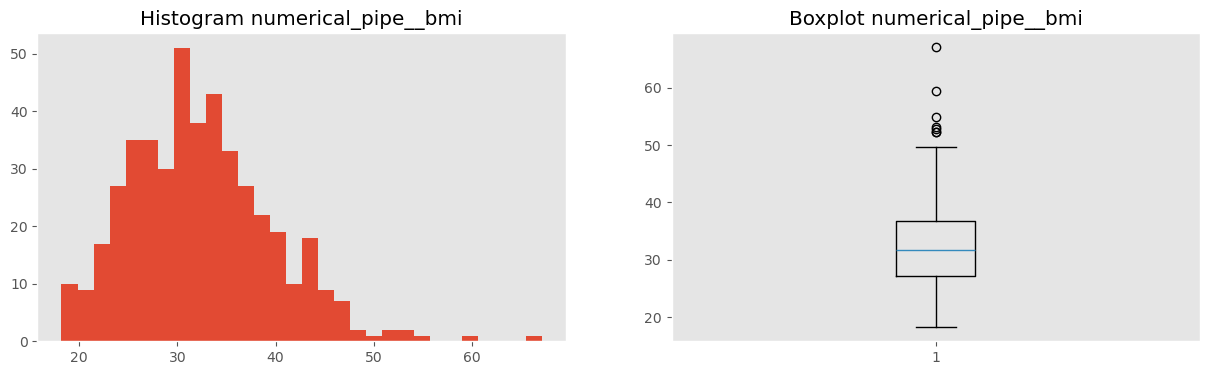

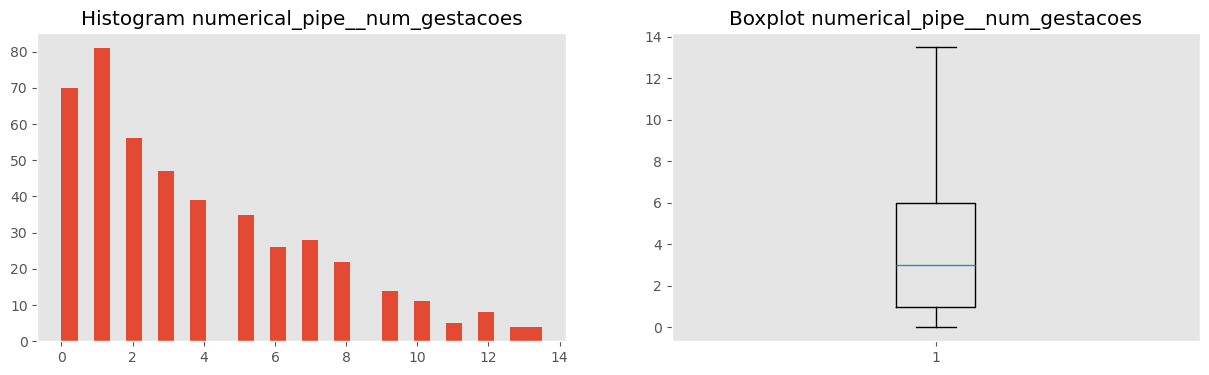

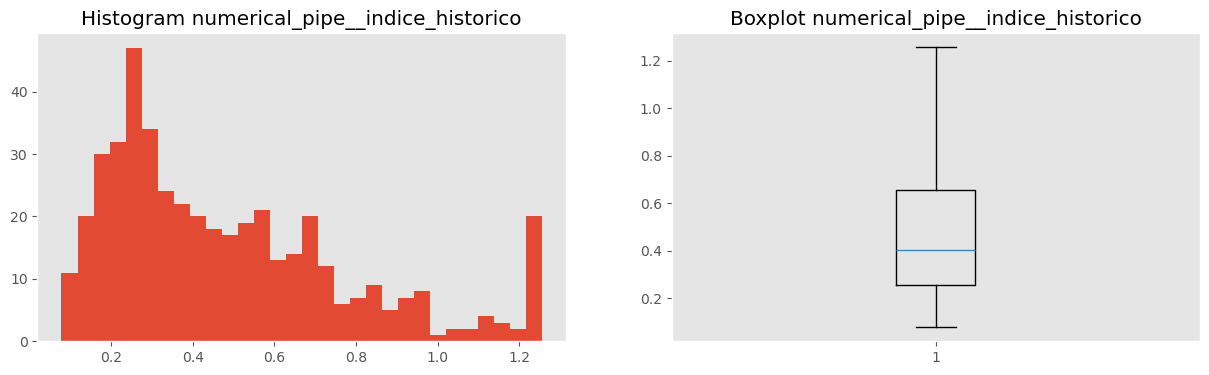

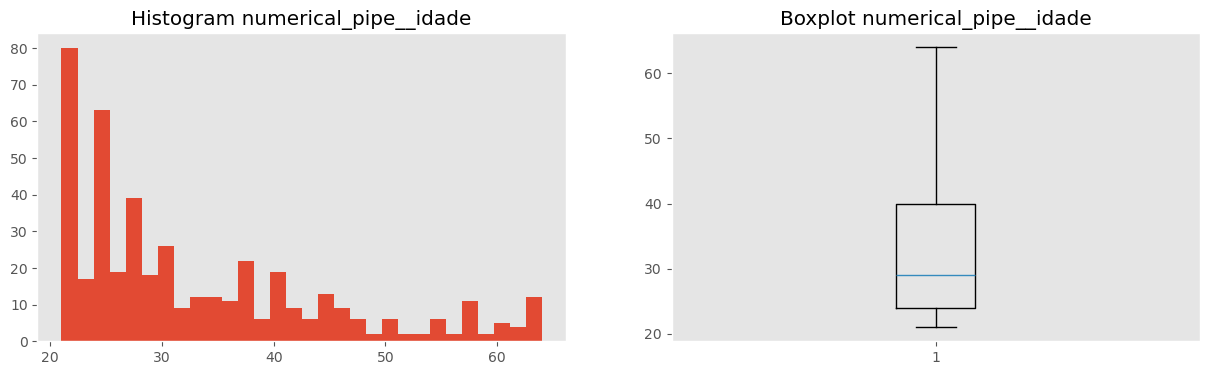

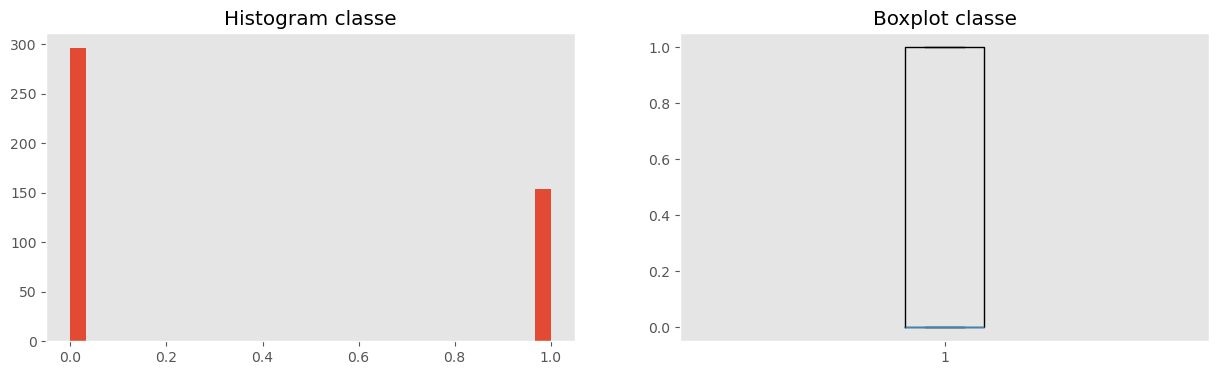

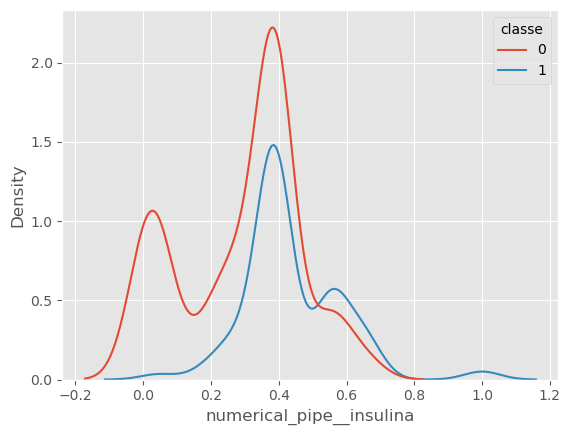

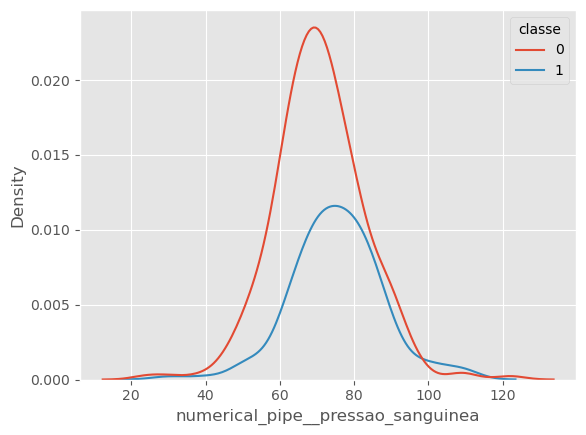

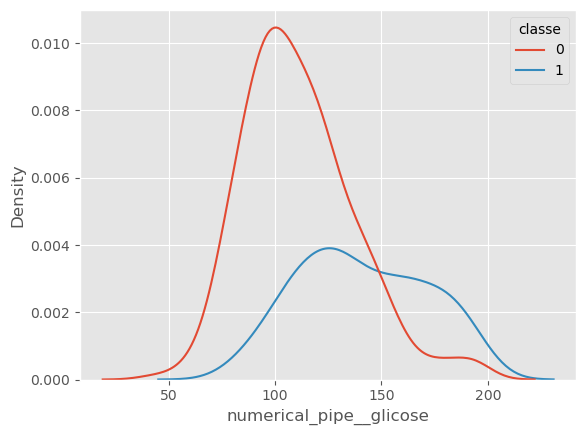

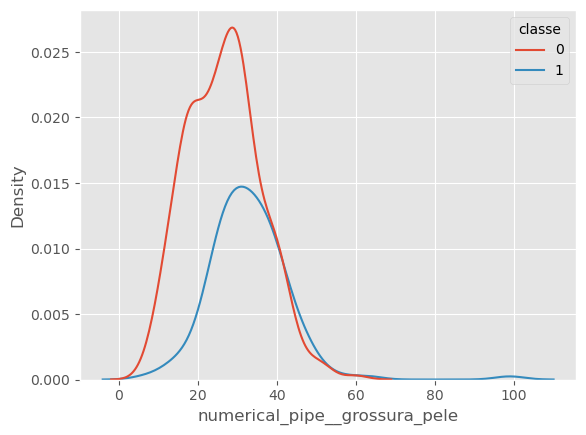

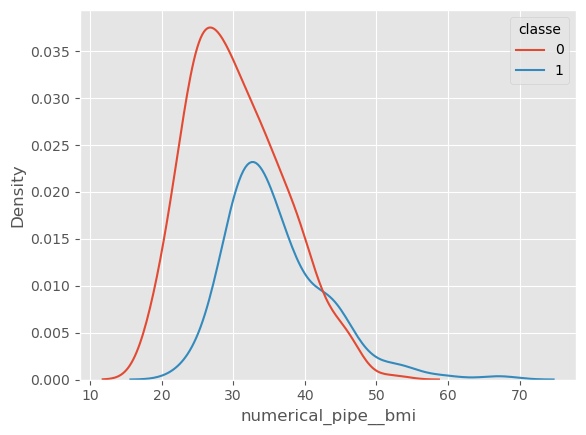

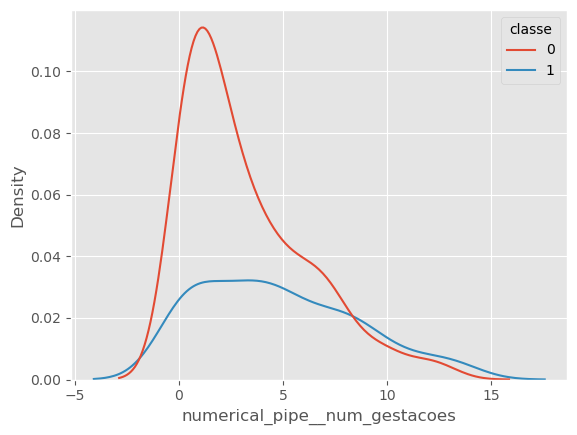

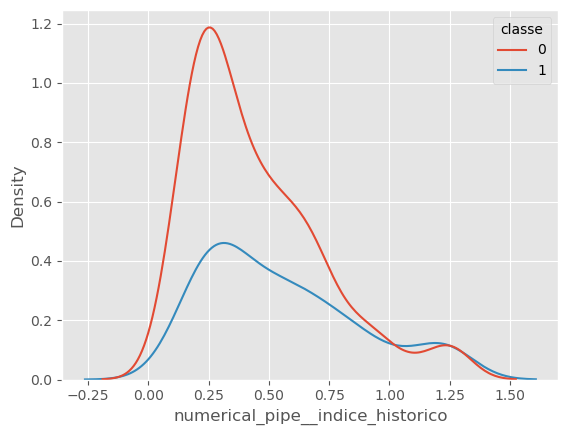

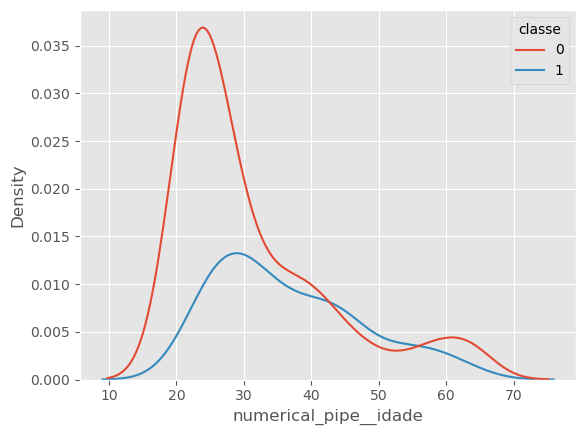

C:\Users\gustavo\Documents\Data Science\08-GitHub\Portifolio\Classification\dsa_single_model\utils\graphs.py:61: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


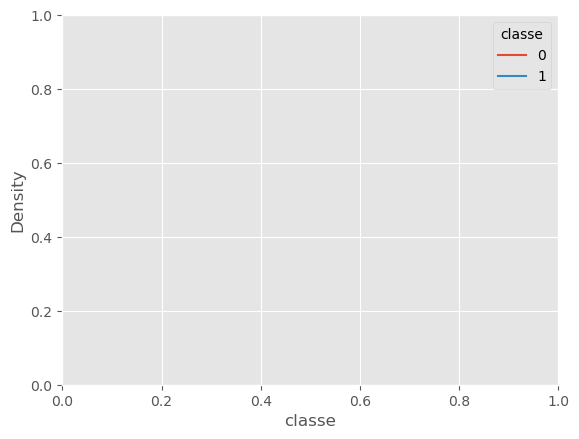

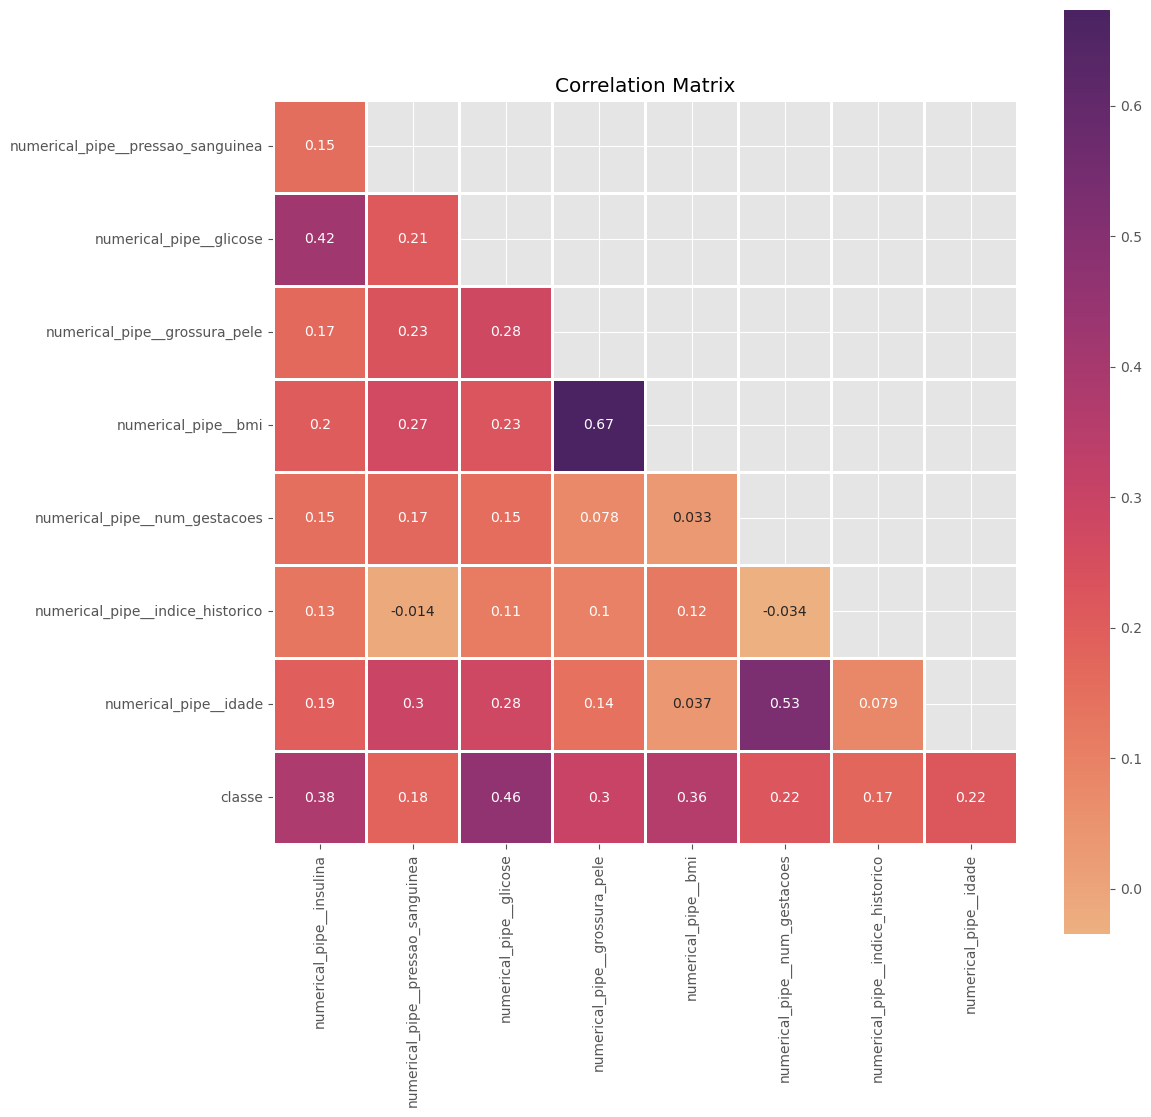

In [16]:
plot_numerical_data(df, target="classe")